In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
fifa = pd.read_csv("/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv")

/tmp/ipykernel_19/2209275765.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv("/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv")


In [4]:
# Checking the dimension of fifa df
rows = fifa.shape[0]
columns = fifa.shape[1]
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 18979
Columns: 77


In [5]:
# Checking columns with null values
print(fifa.columns[fifa.isna().sum()>0])
print()
print(f'Cols with Na values: \n{fifa[["Loan Date End", "Hits"]].isna().sum()}')


Index(['Loan Date End', 'Hits'], dtype='object')

Cols with Na values: 
Loan Date End    17966
Hits              2595
dtype: int64


In [6]:
fifa.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

In [7]:
pd.set_option("display.max_rows", None)
fifa.info()
pd.set_option("display.max_rows", 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [8]:
# Separating numerical and object data types
fifa_num = fifa.select_dtypes("number")
fifa_obj = fifa.select_dtypes("object")

In [9]:
fifa_num.head()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,33,93,93,93,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,85,92,91,95,38,65
1,20801,35,92,92,92,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,89,93,81,89,35,77
2,200389,27,91,93,91,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,87,92,78,90,52,90
3,192985,29,91,91,91,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,76,86,93,88,64,78
4,190871,28,91,91,91,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,91,85,86,94,36,59


In [10]:
fifa_obj.head(10)

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595
5,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184cm,80kg,Right,ST,"Jul 1, 2014",NaN,€111M,€240K,€132M,4 ★,4★,High,Medium,4 ★,248
6,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,\n\n\n\nLiverpool,2017 ~ 2023,RW,175cm,71kg,Left,RW,"Jul 1, 2017",NaN,€120.5M,€250K,€144.3M,3 ★,4★,High,Medium,3 ★,246
7,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,\n\n\n\nLiverpool,2018 ~ 2024,GK,191cm,91kg,Right,GK,"Jul 19, 2018",NaN,€102M,€160K,€120.3M,3 ★,1★,Medium,Medium,3 ★,120
8,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/21_60.png,http://sofifa.com/player/231747/kylian-mbappe/...,France,\n\n\n\nParis Saint-Germain,2018 ~ 2022,"ST, LW, RW",178cm,73kg,Right,ST,"Jul 1, 2018",NaN,€185.5M,€160K,€203.1M,4 ★,5★,High,Low,3 ★,1.6K
9,M. ter Stegen,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/21_60.png,http://sofifa.com/player/192448/marc-andre-ter...,Germany,\n\n\n\nFC Barcelona,2014 ~ 2022,GK,187cm,85kg,Right,GK,"Jul 1, 2014",NaN,€110M,€260K,€147.7M,4 ★,1★,Medium,Medium,3 ★,130


In [11]:
# Installing pyspellchecker
!pip install pyspellchecker

# Import pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.4 MB/s eta 0:00:00


In [12]:
# Splitting the Contract column to contract start and contract end 
fifa_obj[["contract_start", "contract_end"]] = fifa_obj["Contract"].str.split(" ~ ", expand=True, n=1)
# Removing the Contract column
fifa_obj = fifa_obj.drop("Contract", axis=1)

In [13]:
# Remove trailing and leading whitespaces
fifa_obj["Club"] = fifa_obj["Club"].str.strip()

In [14]:
# Removing the unit to change to integer type
fifa_obj["Height"] = fifa_obj["Height"].str.replace("cm", "")
fifa_obj["Weight"] = fifa_obj["Weight"].str.replace("kg", "")

In [15]:
# Rename Height and Weight and add the units of measurement
fifa_obj.rename(columns={"Height": "height_cm", "Weight": "weight_kg"}, inplace=True)

In [16]:
# Height and weight converter
def lbs_to_kg(weight):
    if "lbs" in weight:
        return round(float(weight.replace("lbs", "")) * 0.453592, 0)
    else: 
        return float(weight)
    
    
def ft_to_cm(height):
    if "\'" in height: 
        height = height.replace("\'", ".")
        height = height.replace('"', "")
        return round(float(height)*30.48, 0)
    else:
        return float(height)
        

In [17]:
# Look for inconsistent format
fifa_obj["height_cm"].unique()
fifa_obj["weight_kg"].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [18]:
# Applying the functions
fifa_obj["weight_kg"] = fifa_obj["weight_kg"].apply(lbs_to_kg)
fifa_obj["height_cm"] = fifa_obj["height_cm"].apply(ft_to_cm)

In [19]:
# Checking the changes
print(f"Weight: \n{fifa_obj['weight_kg'].unique()}") 
print()
print(f"Height: \n{fifa_obj['height_cm'].unique()}")

Weight: 
[ 72.  83.  87.  70.  68.  80.  71.  91.  73.  85.  92.  69.  84.  96.
  81.  82.  75.  86.  89.  74.  76.  64.  78.  90.  66.  60.  94.  79.
  67.  65.  59.  61.  93.  88.  97.  77.  62.  63.  95. 100.  58.  98.
 103.  99. 102.  56. 101.  57.  55. 104. 107. 110.  53.  50.  54.  52.]

Height: 
[170. 187. 188. 181. 175. 184. 191. 178. 193. 185. 199. 173. 168. 176.
 177. 183. 180. 189. 179. 195. 172. 182. 186. 192. 165. 194. 167. 196.
 163. 190. 174. 169. 171. 197. 200. 166. 164. 198. 156. 155. 201. 158.
 162. 161. 160. 203. 157. 202. 159. 206.]


In [20]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits,contract_start,contract_end
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771,2004,2021
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562,2018,2022
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150,2014,2023
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207,2015,2023
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595,2017,2022


In [21]:
teams = fifa_obj["Club"].nunique()
print(f"Teams: {teams}")

nationality = fifa_obj["Nationality"].nunique()
print(f"Nationality: {nationality}")

Teams: 682
Nationality: 164


In [22]:
!pip install pycountry

import pycountry 


def is_valid_country(name):
    '''Check if the country name is valid
    
        returns: True if valid, country name if False'''
    try:
        pycountry.countries.lookup(name)
        return True
    except LookupError:
        return name

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.1 MB/s eta 0:00:00


In [23]:
# Test the function
ctr = ["US", "Saudi Arabia", "North Korea", "BHjji", "YOur"]

for i in ctr: 
    valid = is_valid_country(i)
    if isinstance(valid, bool):
        pass
    else: 
        print(valid)
    

BHjji
YOur


In [24]:
# Checking the country names
fifa_obj["Nationality"].apply(is_valid_country).unique()
# Returns the names that are not in the pycountry.countries
# The names here are all valid

array([True, 'England', 'Scotland', 'Korea Republic',
       'Bosnia Herzegovina', 'Ivory Coast', 'Wales', 'Russia',
       'Republic of Ireland', 'Turkey', 'DR Congo', 'China PR',
       'Northern Ireland', 'Kosovo', 'Cape Verde', 'Guinea Bissau',
       'Curacao', 'Trinidad & Tobago', 'Antigua & Barbuda',
       'São Tomé & Príncipe', 'Chinese Taipei', 'Palestine', 'Korea DPR',
       'Macau'], dtype=object)

In [25]:
fifa_obj.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Positions', 'height_cm', 'weight_kg', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'contract_start', 'contract_end'],
      dtype='object')

In [26]:
# Checking Preferred foot values
print(fifa_obj["Preferred Foot"].value_counts())

Preferred Foot
Right    14445
Left      4534
Name: count, dtype: int64


In [27]:
# Changing the joined column to datetime type
fifa_obj["Joined"] = pd.to_datetime(fifa_obj["Joined"])

In [28]:
# Making a function to apply to columns Value, Wage and Release Clause
# To change it into float or decimal

def place_value(value):
    val = value.replace("€", "")
    if "M" in val: 
        val1 = val.replace("M", "")
        return float(val1) * 1000000
    elif "K" in val:
        val2 = val.replace("K", "")
        return float(val2) * 1000
    else: 
        return float(val)

In [29]:
# Applying the functions
fifa_obj["Value"] = fifa_obj["Value"].apply(place_value)
fifa_obj["Wage"] = fifa_obj["Wage"].apply(place_value)
fifa_obj["Release Clause"] = fifa_obj["Release Clause"].apply(place_value)

In [30]:
# Renaming value, wage, and release clause columns
fifa_obj.rename(columns={"Value": "value_eur", "Wage": "wage_eur", "Release Clause": "release_clause_eur"}, inplace=True)

In [31]:
# Converting the Loan Date End to date format
fifa_obj["Loan Date End"] = pd.to_datetime(fifa_obj["Loan Date End"], format="%b %d, %Y").dt.date

In [32]:
# Checking if works on Nan values
fifa_obj[-fifa_obj["Loan Date End"].isna()]["Loan Date End"].sample(5)

7472     2021-06-30
1131     2021-06-30
2402     2020-12-31
12064    2021-06-30
11727    2021-06-30
Name: Loan Date End, dtype: object

In [33]:
print(fifa_obj["Best Position"].unique())
print()
print(fifa_obj["A/W"].unique())
print()
print(fifa_obj["D/W"].unique())
print()
print(fifa_obj["Hits"].unique()) # Inconsistent format

['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']

['Medium' 'High' 'Low']

['Low' 'Medium' 'High']

['771' '562' '150' '207' '595' '248' '246' '120' '1.6K' '130' '321' '189'
 '175' '96' '118' '216' '212' '154' '205' '202' '339' '408' '103' '332'
 '86' '173' '161' '396' '1.1K' '433' '242' '206' '177' '1.5K' '198' '459'
 '117' '119' '209' '84' '187' '165' '203' '65' '336' '126' '313' '124'
 '145' '538' '182' '101' '45' '377' '99' '194' '403' '414' '593' '374'
 '245' '3.2K' '266' '299' '309' '215' '265' '211' '112' '337' '70' '159'
 '688' '116' '63' '144' '123' '71' '224' '113' '168' '61' '89' '137' '278'
 '75' '148' '176' '197' '264' '214' '247' '402' '440' '1.7K' '2.3K' '171'
 '320' '657' '87' '259' '200' '255' '253' '196' '60' '97' '85' '169' '256'
 '132' '239' '166' '121' '109' '32' '46' '122' '48' '527' '199' '282' '51'
 '1.9K' '642' '155' '323' '288' '497' '509' '79' '49' '270' '511' '80'
 '128' '115' '156' '204' '143' '140' '152' '220' '134' '225' '

In [34]:
# Function for changing to thousands values with "k" or "K"

def thousand(value):
    if isinstance(value, str):
        value = value.lower()
        if "k" in value:
            return float(value.replace("k", "")) * 1000
        else: 
            return float(value)
    else: return value



In [35]:
# Apply the function to convert values with k to thousands
fifa_obj["Hits"] = fifa_obj["Hits"].apply(thousand)

In [36]:
# Checking if the function works
fifa_obj[fifa_obj["Hits"]>=1000]["Hits"]

8        1600.0
29       1100.0
34       1500.0
68       3200.0
105      1700.0
          ...  
6159     1100.0
6235     1400.0
8116     1000.0
8401     2500.0
15819    6000.0
Name: Hits, Length: 28, dtype: float64

In [37]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,value_eur,wage_eur,release_clause_eur,W/F,SM,A/W,D/W,IR,Hits,contract_start,contract_end
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,4 ★,4★,Medium,Low,5 ★,771.0,2004,2021
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,4 ★,5★,High,Low,5 ★,562.0,2018,2022
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,3 ★,1★,Medium,Medium,3 ★,150.0,2014,2023
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,5 ★,4★,High,High,4 ★,207.0,2015,2023
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,5 ★,5★,High,Medium,5 ★,595.0,2017,2022


In [38]:
fifa_obj.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Positions', 'height_cm', 'weight_kg', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'value_eur', 'wage_eur',
       'release_clause_eur', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'contract_start', 'contract_end'],
      dtype='object')

In [39]:
print(fifa_obj["W/F"].unique())
print(fifa_obj["SM"].unique())
print(fifa_obj["IR"].unique())

['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
['4★' '5★' '1★' '2★' '3★']
['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


In [40]:
def star_rmv(value):
    value = value.replace("★", "")
    return int(value)


# Check if works
stars = ["3★", "4 ★", "5★"]
for s in stars:
    print(star_rmv(s))

3
4
5


In [41]:
# Applying the functions
cols = ["W/F", "SM", "IR"]

for col in cols:
    fifa_obj[col] = fifa_obj[col].apply(star_rmv)

In [42]:
for col in cols:
    print(f"{col}: {fifa_obj[col].unique()}")

W/F: [4 3 5 2 1]
SM: [4 5 1 2 3]
IR: [5 3 4 2 1]


In [43]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,value_eur,wage_eur,release_clause_eur,W/F,SM,A/W,D/W,IR,Hits,contract_start,contract_end
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,4,4,Medium,Low,5,771.0,2004,2021
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,4,5,High,Low,5,562.0,2018,2022
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,3,1,Medium,Medium,3,150.0,2014,2023
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,5,4,High,High,4,207.0,2015,2023
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,5,5,High,Medium,5,595.0,2017,2022


In [44]:
fifa_obj.rename(columns={'Name':"name", 'LongName':"long_name", 'photoUrl':"photo_url", 'playerUrl':"player_url", 'Nationality':"nationality", 'Club':"club",
       'Positions':"positions", 'Preferred Foot':"preferred_foot",'Best Position':"best_position", 'Joined':"joined", 
        'Loan Date End':"loan_date_end", 'W/F':"w/f", 'SM':"sm", 'A/W':"a/w", 'D/W':"d/w", 'IR':"ir", 'Hits':"hits"}, inplace=True)


In [45]:
fifa_obj.head()

,name,long_name,photo_url,player_url,nationality,club,positions,height_cm,weight_kg,preferred_foot,best_position,joined,loan_date_end,value_eur,wage_eur,release_clause_eur,w/f,sm,a/w,d/w,ir,hits,contract_start,contract_end
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,4,4,Medium,Low,5,771.0,2004,2021
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,4,5,High,Low,5,562.0,2018,2022
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,3,1,Medium,Medium,3,150.0,2014,2023
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,5,4,High,High,4,207.0,2015,2023
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,5,5,High,Medium,5,595.0,2017,2022


# Will validate the data cleaning process again after cleaning the numerical columns

In [46]:
# Getting the mean, min, median, and max
fifa_num.describe().iloc[[1, 3, 5, 7], :]

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.41293,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.87502,49.866221,64.368934
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.00000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.00000,12.000000,28.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.00000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.00000,53.000000,65.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,96.000000,94.000000,94.000000,93.000000,96.000000,464.000000,97.000000,96.00000,96.000000,95.000000,97.000000,444.000000,95.000000,95.000000,97.000000,97.000000,94.000000,421.000000,96.000000,91.000000,95.000000,95.000000,92.000000,96.00000,272.000000,94.000000,93.000000,90.000000,440.000000,90.000000,92.000000,93.000000,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.00000,91.000000,91.000000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
print(len(fifa_num.columns))

54


In [49]:

    print(i)

YOur


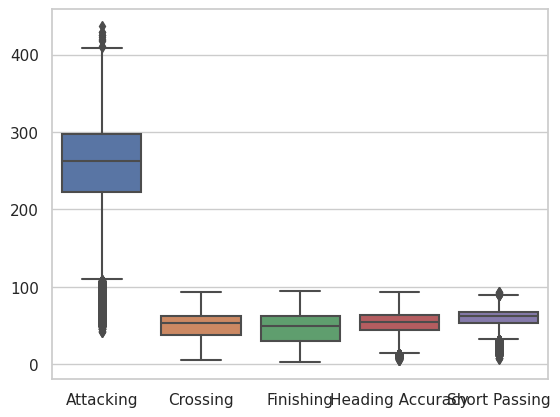

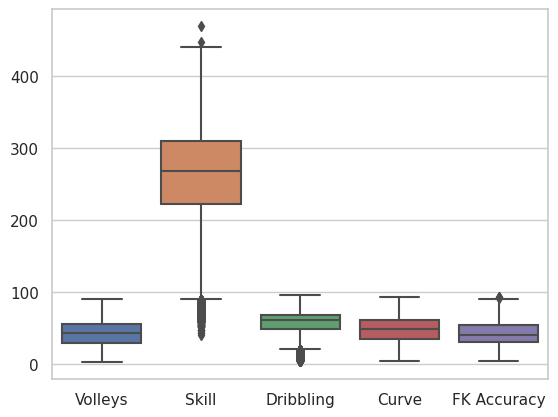

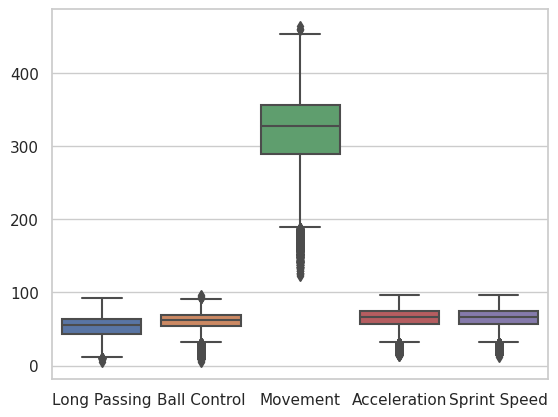

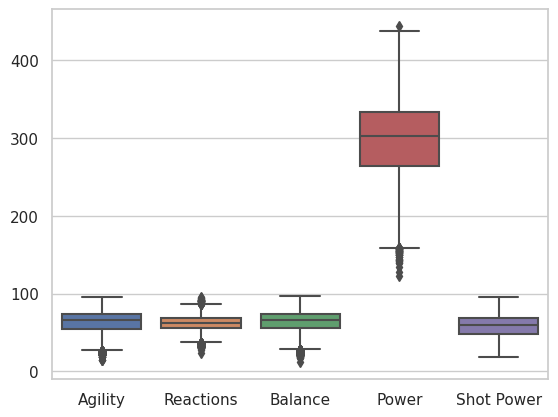

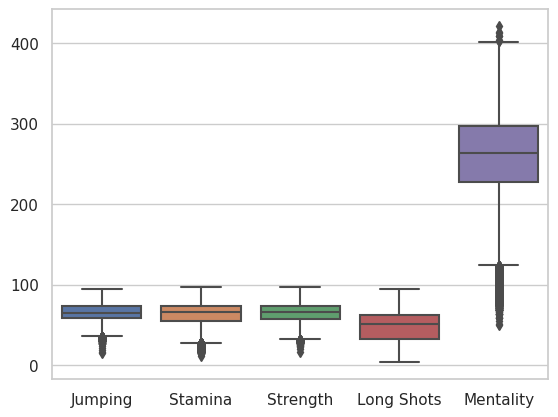

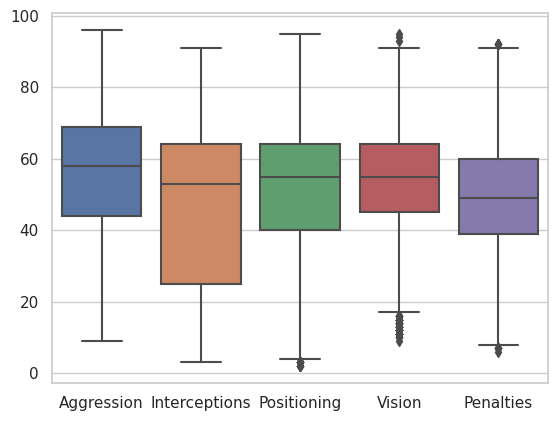

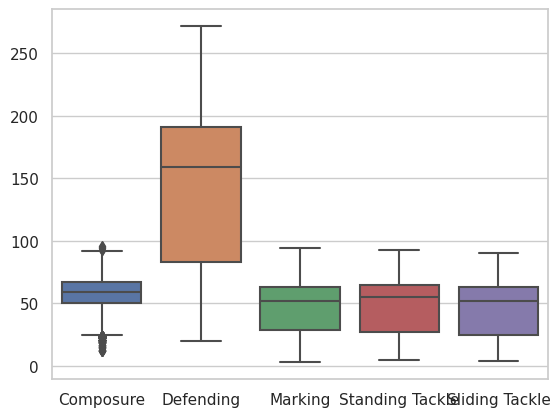

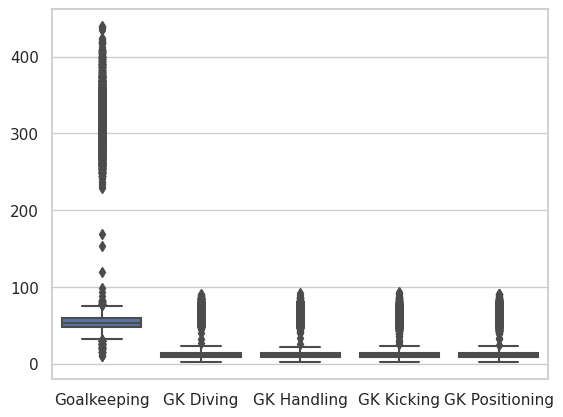

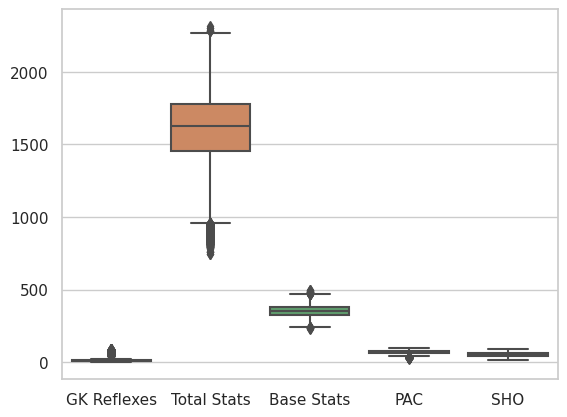

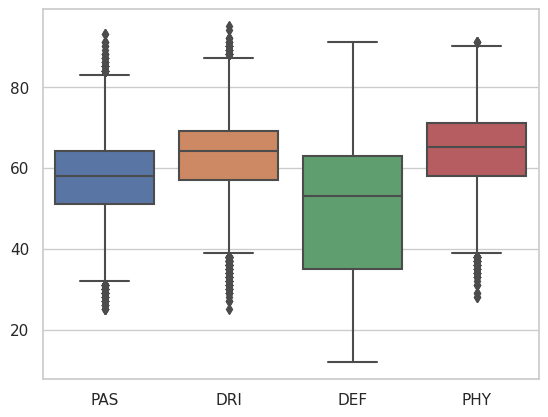

In [50]:
sns.set(style="whitegrid")
for i in range(5, 55, 5):
    sns.boxplot(fifa_num.iloc[:, i:i+5])
    plt.show()